# Elasticnet
## 共役勾配 conjugate gradient
### 実装ミスってる
### https://stanford.edu/class/ee364b/projects/2014projects/reports/chrzanowski_report.pdf


f = L + (\eta* w_2 / 2 + (1-\eta)* w_1)* \lambda


16295.353914614872
(100,)
(100, 1)


C:\Users\osk\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


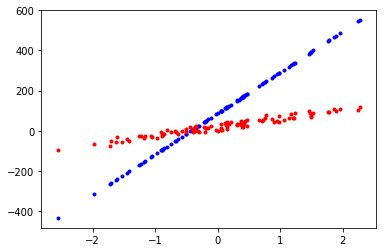

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression


class elasticNetRegressionCG(object):
    def __init__(self, eta_=0.1, lambda_=0.1, max_iter=1000):
        # eta: 制限項(L1ノルムとL2)ノルムの配分
        # lambda: 制限項の重み 
        self.lambda_ = lambda_
        self.eta_ = eta_
        self.max_iter = max_iter
        self.w = None
        
    def addBias(self, x):
        b = np.ones(x.shape[0])
        v = np.column_stack((b, x))
        return v  
    
    def calcK(self, X):
        arg1 = X.T @ X + self.lambda_ * (1 - self.eta_) * np.identity(X.shape[1])
        arg2 = -X.T @ X
        val1 = np.c_[arg1, arg2]
        val2 = np.c_[arg2, arg1]
        ret = np.r_[val1, val2]
        return ret
    
    def calcB(self, X, y):
        val1 = -X.T @ y + self.lambda_ * self.eta_ * np.ones(X.shape[1])
        val2 = X.T @ y - self.lambda_ * self.eta_ * np.ones(X.shape[1])
        ret = -np.r_[val1, val2]
        return ret
    
    def getZ(self, u, l):
        return np.r_[u, l]
    
    def getAlpha(self, r, p, A):
        nume = r.T @ r
        deno = p.T @ A @ p
        return nume / deno
    
    def getBeta(self, r_new, r):
        nume = r_new.T @ r_new
        deno = r.T @ r
        return nume / deno
    
    def decomposeZ(self, z):
        size = z.shape[0] // 2
        u = z[0: size]
        l = z[size:]
        return (u, l)
    
    def fit(self, x, y):
        X = self.addBias(x)
        X = X / np.sqrt(X.shape[0])
        u = np.zeros(X.shape[1])
        l = np.zeros(X.shape[1])
        z = self.getZ(u, l)
        K = self.calcK(X)
        b = self.calcB(X, y)
        r = b - K @ z
        p = r
        for iter in range(self.max_iter):
            alpha = self.getAlpha(r, p, K)
            z_new = z + alpha * p
            z = np.array([z_new[i] if z_new[i] > 0 else z[i] for i in range(z.shape[0])])
            r_new = r - alpha * K @ p
            beta = self.getBeta(r_new, r)
            p = r_new + beta * p
            r = r_new
        u, l = self.decomposeZ(z)
        self.w = u - l
    
    def predict(self, x):
        X = self.addBias(x)
        pred = X @ self.w
        return pred
    
    def score(self, x, y):
        pred = self.predict(x)
        score = np.sum(np.power(y - pred, 2)) / (2.0 * y.shape[0])
        return score
        
x, y = make_regression(n_samples=100, n_features=1, random_state=0, noise=10.0, bias=20.0)
clf = elasticNetRegressionCG()
clf.fit(x, y)
score = clf.score(x, y)
print(score)

# show
pred = clf.predict(x)
print(pred.shape)
print(x.shape)
plt.scatter(x, pred, color='blue', marker='.')
plt.scatter(x, y, color='red', marker='.')
plt.show()

In [ ]:
# 多項式
## y = x^3 - 10x^2 - x + 3
import numpy as np
import matplotlib.pyplot as plt

def getPoly(val):
    return val**3 - 10.0 * val**2 - val + 3.0

# prepare
dim = 3
ar = np.arange(0, 10, 0.1)
trueY = np.array([getPoly(val) for val in ar])
y = np.array([getPoly(val)+np.random.normal(0, 20.0) if (val>0.5 and val < 9.5) else getPoly(val)+np.random.normal(0, 30) for val in ar])
x = np.array([[val**k for k in range(1, dim+1)] for val in ar]).reshape(-1, dim)

# fit
clf = ElasticNet()
clf.fit(x, y)

# show
pred = clf.predict(x)
plt.scatter(ar, trueY, color='green', marker='.')
plt.scatter(ar, pred, color='blue', marker='.')
plt.scatter(ar, y, color='red', marker='.')
plt.show()